#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Variable	Definition	Key**
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex
# Age	Age in years
# sibsp	of siblings / spouses aboard the Titanic
# parch	 of parents / children aboard the Titanic
#ticket	Ticket number
#fare	Passenger fare
#cabin	Cabin number
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
#ariable Notes
#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower
#age: Age is fractional if less than 1. If the age is estimated, is it in the #form of xx.5
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

#Load Dataset

In [2]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Passenge_test1.csv")
train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Passenger_train.csv")

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Marge dataset

In [7]:
frames = [test, train]
df = pd.concat(frames)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [ ]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

#Check Duplicates values

In [ ]:
df.duplicated().sum()

0

#Check to informations of data





In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#Chech to sum of null values and Plot

<Axes: >

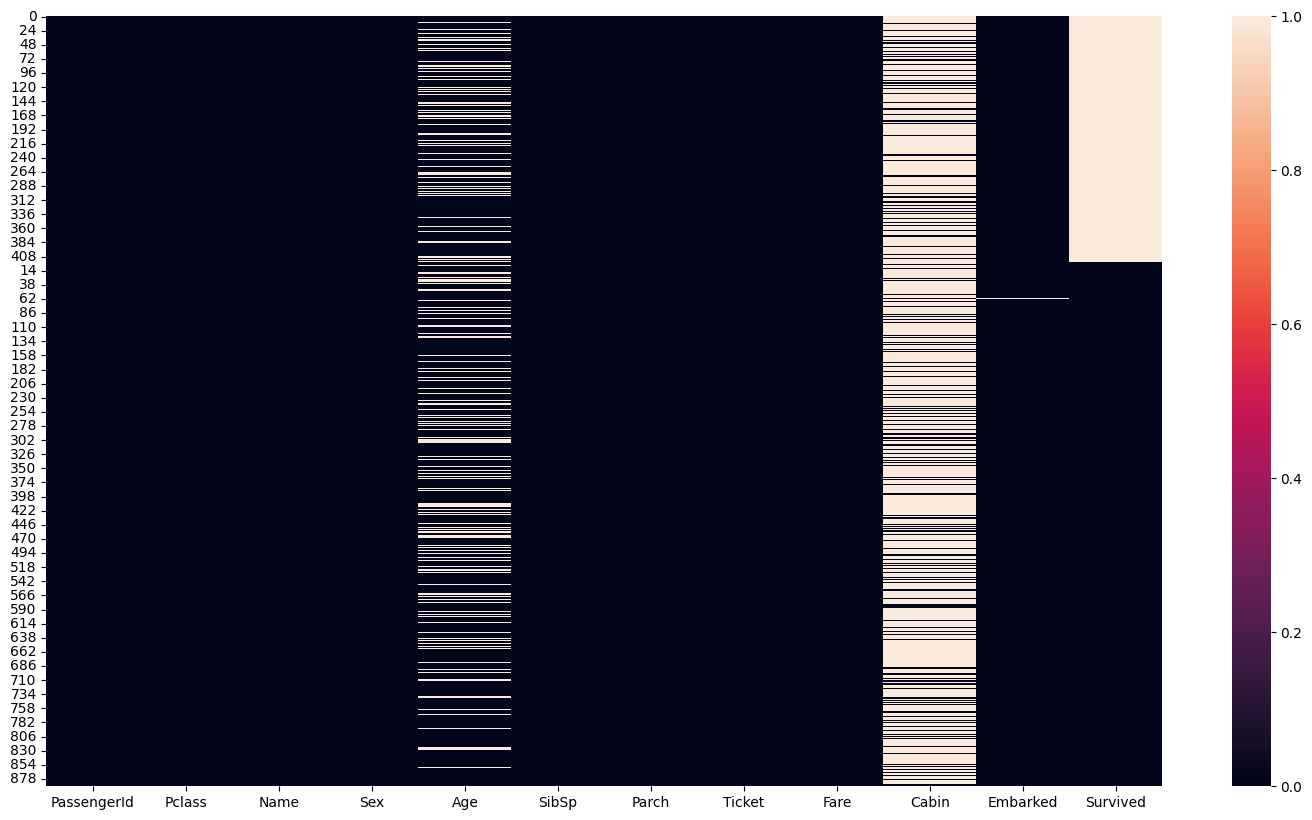

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [ ]:
#Discreptive information of numerical category
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
#Discreptive information of numerical categorial  category
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,891.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.383838
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


#Backup of real data

In [52]:
df1= df.copy()

# **Data Cleaning Process**

In [12]:
# show the missing values in dataset with ratio

def missing_values_table(df):

    na_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
    n_miss = df1[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df1[na_columns].isnull().sum() / df1.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_table(df1)

,n_miss,ratio
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08


#Drop Cabin & Survived column because of 77.46%,31.93% NULL Values present in Cabin & Survived columns

In [13]:
df1 = df1.drop(columns = ["Cabin"])
df1 = df1.drop(columns = ["Survived"])

#Handiling of Missing Values in  Age Column

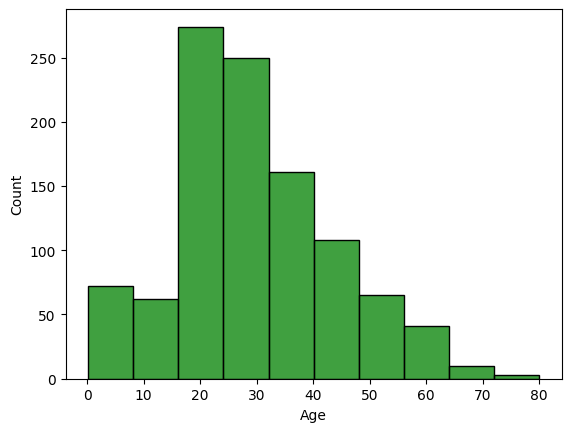

In [66]:
sns.histplot(df1['Age'],bins=10,color="g")
plt.show()

#Check Outlier

<Axes: >

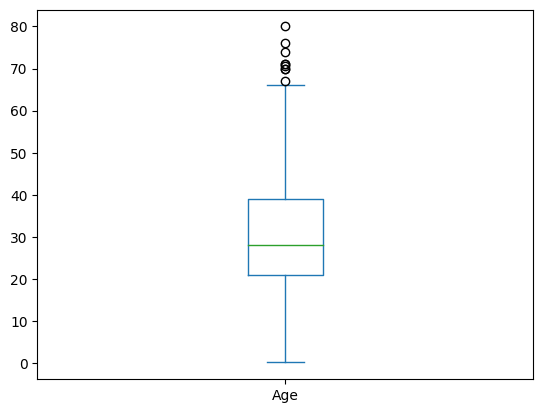

In [26]:
df1['Age'].plot(kind='box')

In [33]:
# handale outlire
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outlier
R_Out_l=df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]
df1=R_Out_l

<Axes: >

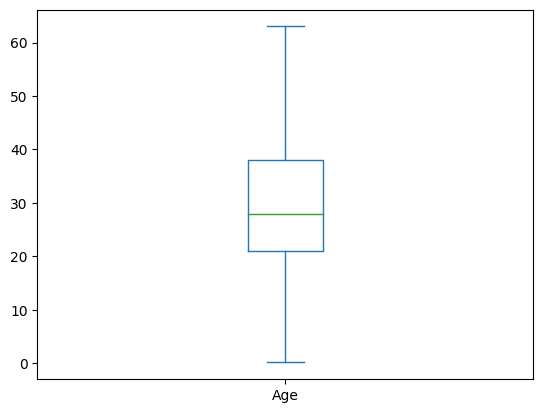

In [35]:
#After remove Outlier Plot
df1['Age'].plot(kind='box')

In [36]:
df1['Age'].isnull().sum()

0

#Handiling of Ticket Column

In [37]:
#Ticket
def preprocess(df):

    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

    def ticket_number(x):
        return x.split(" ")[-1]

    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    df1["Name"] = df1["Name"].apply(normalize_name)
    df1["Ticket_number"] = df1["Ticket"].apply(ticket_number)
    df1["Ticket_item"] = df1["Ticket"].apply(ticket_item)
    return df1

df1 = preprocess(df1)

df1

<ipython-input-37-07c48f4cfc77>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Name"] = df1["Name"].apply(normalize_name)
<ipython-input-37-07c48f4cfc77>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Ticket_number"] = df1["Ticket"].apply(ticket_number)
<ipython-input-37-07c48f4cfc77>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_number,Ticket_item
0,892,3,Kelly Mr James,male,34.5,0,0,330911,7.8292,Q,330911,NONE
1,893,3,Wilkes Mrs James Ellen Needs,female,47.0,1,0,363272,7.0000,S,363272,NONE
2,894,2,Myles Mr Thomas Francis,male,62.0,0,0,240276,9.6875,Q,240276,NONE
3,895,3,Wirz Mr Albert,male,27.0,0,0,315154,8.6625,S,315154,NONE
4,896,3,Hirvonen Mrs Alexander Helga E Lindqvist,female,22.0,1,1,3101298,12.2875,S,3101298,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,Rice Mrs William Margaret Norton,female,39.0,0,5,382652,29.1250,Q,382652,NONE
886,887,2,Montvila Rev Juozas,male,27.0,0,0,211536,13.0000,S,211536,NONE
887,888,1,Graham Miss Margaret Edith,female,19.0,0,0,112053,30.0000,S,112053,NONE
889,890,1,Behr Mr Karl Howell,male,26.0,0,0,111369,30.0000,C,111369,NONE


In [38]:
#Drop Ticket column name
df1=df1.drop(['Ticket'], axis=1)
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item
0,892,3,Kelly Mr James,male,34.5,0,0,7.8292,Q,330911,NONE
1,893,3,Wilkes Mrs James Ellen Needs,female,47.0,1,0,7.0000,S,363272,NONE
2,894,2,Myles Mr Thomas Francis,male,62.0,0,0,9.6875,Q,240276,NONE
3,895,3,Wirz Mr Albert,male,27.0,0,0,8.6625,S,315154,NONE
4,896,3,Hirvonen Mrs Alexander Helga E Lindqvist,female,22.0,1,1,12.2875,S,3101298,NONE
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,Rice Mrs William Margaret Norton,female,39.0,0,5,29.1250,Q,382652,NONE
886,887,2,Montvila Rev Juozas,male,27.0,0,0,13.0000,S,211536,NONE
887,888,1,Graham Miss Margaret Edith,female,19.0,0,0,30.0000,S,112053,NONE
889,890,1,Behr Mr Karl Howell,male,26.0,0,0,30.0000,C,111369,NONE


In [39]:
print(df1['Ticket_number'].isnull().sum())
print(df1['Ticket_item'].isnull().sum())


0
0


# Handiling of Fare Null values

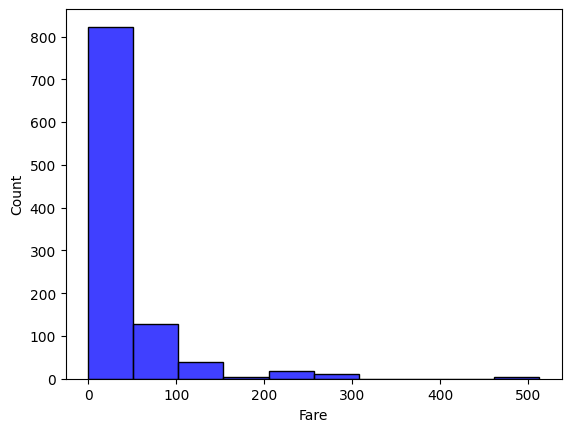

In [40]:
sns.histplot(df1['Fare'],bins=10,color='b')
plt.show()

In [41]:
Fare_mode_value = df1['Fare'].median()
Fare_mode_value

15.7417

In [42]:
# Fill in Fare Nans with median to avoid outliers
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].median())
df1['Fare'].isnull().sum()

0

#Handiling of Embarked Column

<Axes: >

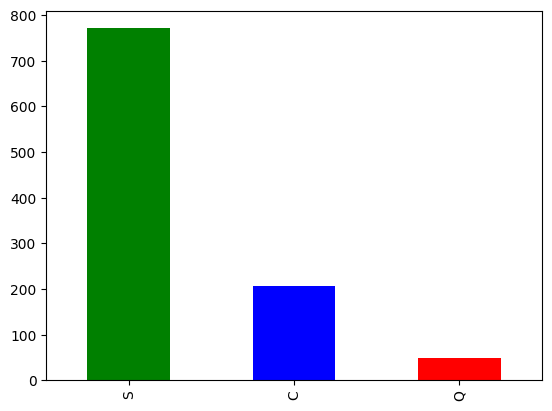

In [43]:
df1['Embarked'].value_counts().plot(kind='bar',color=['g','b','r'])


In [45]:
#Calculate mode value
mode_value = df1['Embarked'].mode().values[0]
mode_value

'S'

In [46]:
# Fill in Embarked Nans with mode value
df1['Embarked'] = df1['Embarked'].fillna(mode_value)
df1['Embarked'].isnull().sum()

0

#**Chech to persentage of male and female**


<Axes: ylabel='Sex'>

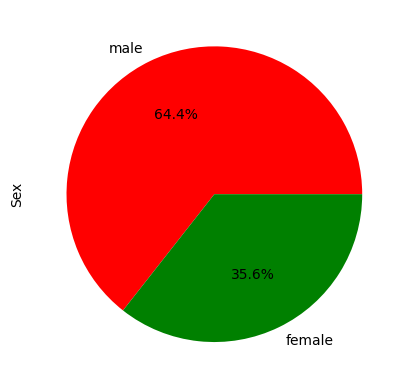

In [65]:
df1['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors = ['r','g'])

# **The Final Output Zeros Null Values**

In [ ]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Ticket_number    0
Ticket_item      0
dtype: int64

In [ ]:
df1.to_csv("Passengers_data1.csv",index=False)